In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.drop('Sex',axis=1,inplace=True)

In [6]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
x = df.iloc[:,0:-1].values
y=df.iloc[:, -1].values

In [8]:
y.shape,x.shape

((4177,), (4177, 7))

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [10]:
#x = np.vstack((np.ones((x.shape[0],)),x.T)).T
#x_test = np.vstack((np.ones((x_test.shape[0],)),x_test.T)).T

In [11]:
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (2923, 7)
Shape of x_test (1254, 7)
Shape of y_train (2923,)
Shape of y_test (1254,)


In [12]:
def model(x,y,learning_rate,iteration):
  m = y.size
  theta = np.zeros((x.shape[1],1))
  cost_list=[]

  for i in range(iteration):
    
    y_pred = np.dot(x,theta)
    cost=(1/(m))*np.sum(np.square(y_pred-y))
    d_theta = (2/m)*np.dot(x.T,y_pred-y)
    theta=theta - learning_rate*d_theta
    cost_list.append(cost)
    if i==1 or i%10==0:
     print("Cost is:" , cost)
  return  theta,cost_list

In [13]:
iteration = 100
learning_rate = 0.00009
theta , cost_list = model(x_train,y_train,learning_rate=learning_rate,iteration=iteration)

Cost is: 319515.0
Cost is: 319355.7880863084
Cost is: 317927.1967819169
Cost is: 316348.947772267
Cost is: 314780.19524255645
Cost is: 313220.88181313034
Cost is: 311670.9504510667
Cost is: 310130.3444680763
Cost is: 308599.0075184237
Cost is: 307076.88359685807
Cost is: 305563.91703655216


In [14]:
cost_list

[319515.0,
 319355.7880863084,
 319196.67223696643,
 319037.6523937712,
 318878.7284985562,
 318719.90049318934,
 318561.16831957357,
 318402.53191964695,
 318243.99123538384,
 318085.54620879295,
 317927.1967819169,
 317768.9428968362,
 317610.7844956647,
 317452.7215205509,
 317294.75391367957,
 317136.88161726994,
 316979.1045735756,
 316821.4227248866,
 316663.83601352683,
 316506.34438185545,
 316348.947772267,
 316191.6461271903,
 316034.4393890883,
 315877.32750046114,
 315720.3104038415,
 315563.3880417992,
 315406.56035693525,
 315249.8272918893,
 315093.18878933263,
 314936.6447919749,
 314780.19524255645,
 314623.84008385486,
 314467.57925868133,
 314311.4127098829,
 314155.34038033936,
 313999.3622129674,
 313843.478150716,
 313687.68813657016,
 313531.99211354845,
 313376.3900247069,
 313220.88181313034,
 313065.4674219437,
 312910.14679430326,
 312754.9198734016,
 312599.7866024632,
 312444.7469247491,
 312289.8007835544,
 312134.94812220824,
 311980.1888840739,
 311825.5

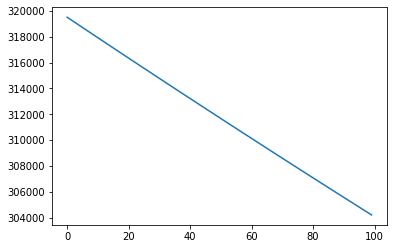

In [15]:
rng = np.arange(0,iteration)
plt.plot(rng,cost_list)
plt.show()

In [16]:
#L1-Regularisation :- Regularisation used to avoid Overfitting.
#L1 Regularisation :-It adds an L1 penalty that is equal to the absolute value of the magnitude of coefficient, or simply restricting the size of coefficients. For example, Lasso regression implements this method. 

#L2 Regularization: It adds an L2 penalty which is equal to the square of the magnitude of coefficients. For example, Ridge regression and SVM implement this method.

In [17]:
#l1
a =  learning_rate*(np.sum(np.abs(theta)))

a

0.1251567655057878

In [18]:
#L2
b = learning_rate*(np.sum(np.square(theta)))
b

0.012519442318453422

In [19]:
learning_rate = 0.005
a =  learning_rate*(np.sum(np.abs(theta)))

a

6.953153639210433

In [20]:
b = learning_rate*(np.sum(np.square(theta)))
b

0.6955245732474122